In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-summarization-dataset/test_final_eng.csv
/kaggle/input/english-summarization-dataset/val_final_eng.csv
/kaggle/input/english-summarization-dataset/train_final_eng.csv


In [2]:
import pandas as pd
df_train_final_mar=pd.read_csv("/kaggle/input/english-summarization-dataset/train_final_eng.csv")
df_train_final_mar['text'][0]

"The BBC has moved the start time of its 95-minute singing programme from 7pm to 6.45pm on Saturday 13 April. It will overlap with the first BGT which will run from 7pm to 8.35pm. It is thought the ITV scheduling allows the show to be watched by younger fans and has been a regular slot for some of its biggest entertainment shows. Britain's Got Talent has started at 8pm for the last three years. The competition puts more pressure on The Voice to succeed after last year's series experienced a big drop in viewers after its early stages. The semi-final drew half the audience it managed at its peak. An 11-date tour, featuring performances by the its eight finalists, was cancelled following poor ticket sales. More than seven million viewers tuned in to see Leanne Mitchell win the first series, almost five million fewer viewers than the final of BGT. The first episode of this series pulled in an average audience of 6.2 million viewers and was beaten by ITV's Ant & Dec's Saturday Night Takeawa

In [3]:
import pandas as pd
df_val_final_mar=pd.read_csv("/kaggle/input/english-summarization-dataset/val_final_eng.csv")
df_val_final_mar['text'][0]

'The AQE board is planning to go ahead with one test paper following the cancellation of transfer tests in January. AQE said it had taken the decision following a meeting with schools. Thirty-four grammar schools were originally planning to use the AQE test to admit pupils for 2021. In a statement to BBC News NI, the organisation said it was "acutely aware of the pressure on pupils, parents and teachers as a consequence of the coronavirus pandemic and the decisions which the UK Government and Northern Ireland Executive have had to take in light of public health requirements". "Following a meeting with the schools which use the Common Entrance Assessment, produced by AQE Limited, it has been agreed that to enable the assessment to take place in the current circumstances, the assessment will be reduced to a single paper to be held on Saturday 27 February, provided it can take place in public health circumstances then prevailing," it said. "Inevitably, the question will be asked why the a

In [4]:
from huggingface_hub import notebook_login
notebook_login()

In [5]:
!pip install datasets==2.15

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.2.0
    Uninstalling fsspec-2024.2.0:
      Successfully uninstalled fsspec-2024.2.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
    

In [6]:
import matplotlib as plt
from transformers import pipeline
import torch

2024-04-05 18:17:21.297109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 18:17:21.297204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 18:17:21.433898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
pipe = pipeline("summarization", model="october-sd/pegasus-xsum-finetuned-en-sum")

config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/254 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.60M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

In [8]:
pipe_out = pipe(df_train_final_mar["text"][0])
print("Summary:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

Summary:
The start time of this year's Britain's Got Talent will clash with The Voice.


In [10]:
df_train_final_mar["summary"][0]

"The Voice will clash with ITV rival Britain's Got Talent when the show launches next week as the channels compete for viewers."

In [11]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "october-sd/pegasus-xsum-finetuned-en-sum"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [12]:
from datasets import Dataset
dataset = Dataset.from_pandas(df_train_final_mar)
len(dataset)
print(dataset[0])

{'source_url': 'https://www.bbc.com/news/newsbeat-22028218', 'target_url': 'https://www.bbc.com/news/newsbeat-22028218', 'text': "The BBC has moved the start time of its 95-minute singing programme from 7pm to 6.45pm on Saturday 13 April. It will overlap with the first BGT which will run from 7pm to 8.35pm. It is thought the ITV scheduling allows the show to be watched by younger fans and has been a regular slot for some of its biggest entertainment shows. Britain's Got Talent has started at 8pm for the last three years. The competition puts more pressure on The Voice to succeed after last year's series experienced a big drop in viewers after its early stages. The semi-final drew half the audience it managed at its peak. An 11-date tour, featuring performances by the its eight finalists, was cancelled following poor ticket sales. More than seven million viewers tuned in to see Leanne Mitchell win the first series, almost five million fewer viewers than the final of BGT. The first episo

In [13]:
dataset_2 = Dataset.from_pandas(df_val_final_mar)

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

PegasusForConditionalGeneration(
  (model): PegasusModel(
    (shared): Embedding(96103, 1024, padding_idx=0)
    (encoder): PegasusEncoder(
      (embed_tokens): Embedding(96103, 1024, padding_idx=0)
      (embed_positions): PegasusSinusoidalPositionalEmbedding(512, 1024)
      (layers): ModuleList(
        (0-15): 16 x PegasusEncoderLayer(
          (self_attn): PegasusAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_nor

In [16]:
d_len = [len(tokenizer.encode(s)) for s in dataset["text"]]
s_len = [len(tokenizer.encode(s)) for s in dataset["summary"]]

Token indices sequence length is longer than the specified maximum sequence length for this model (1511 > 512). Running this sequence through the model will result in indexing errors


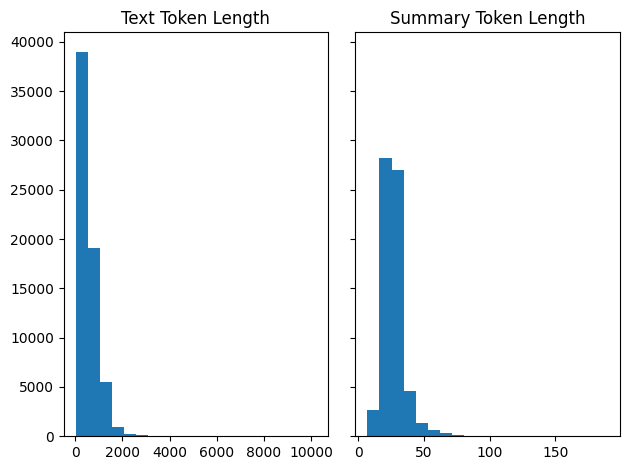

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].hist(d_len, bins=20)
axes[0].set_title("Text Token Length")
axes[1].hist(s_len, bins=20)
axes[1].set_title("Summary Token Length")
plt.tight_layout()
plt.show()

In [19]:
tokenizer.as_target_tokenizer()

In [20]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["text"], max_length=512, truncation=True)

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch["summary"], max_length=128, truncation=True)

    return {
        "input_ids": input_encodings["input_ids"],
        "attention_mask": input_encodings["attention_mask"],
        "labels": target_encodings["input_ids"]
    }

In [21]:
tokenized_datasets = dataset.map(convert_examples_to_features, batched=True)
tokenized_test_set = dataset_2.map(convert_examples_to_features, batched=True)

Map:   0%|          | 0/65000 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3892: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [22]:
!pip install py7zr

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9


In [23]:
def data_transform(encode):
    
    l = []
    for i,j,k in zip(encode['input_ids'], encode['attention_mask'], encode['labels']):
        dic = {
            'input_ids': i,
            'attention_mask': j,
            'labels': k
        }
        l.append(dic)
        
    return l

tokenized_datasets = data_transform(tokenized_datasets)
tokenized_test_set = data_transform(tokenized_test_set)

In [24]:
dataset = {'train': dataset, 'val':dataset_2}

In [25]:
len(dataset["train"])

65000

In [26]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [37]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 4
# Show the training loss with every epoch
logging_steps = len(dataset["train"]) // batch_size
model_name = model_ckpt.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"pegasus-xsum-finetuned-en-sum",
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    fp16=False,
    save_total_limit=1,
    save_strategy="epoch",
    predict_with_generate=True,
    num_train_epochs=num_train_epochs,
    logging_steps=logging_steps,
    gradient_accumulation_steps=16,
    push_to_hub=True,
)

In [38]:
model.gradient_checkpointing_enable()

In [29]:
tokenized_datasets = tokenized_datasets.remove_columns(
    dataset["train"].column_names
)

AttributeError: 'list' object has no attribute 'remove_columns'

In [30]:
tokenized_test_set = tokenized_test_set.remove_columns(
    dataset["val"].column_names
)

AttributeError: 'list' object has no attribute 'remove_columns'

In [39]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_test_set,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [40]:
trainer.train(resume_from_checkpoint=True)

There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,1.511505
2,No log,1.509449
3,No log,1.509507


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 64, 'num_beams': 8, 'length_penalty': 0.6, 'forced_eos_token_id': 1}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 64, 'num_beams': 8, 'length_penalty': 0.6, 'forced_eos_token_id': 1}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-

TrainOutput(global_step=2028, training_loss=1.171378652960121, metrics={'train_runtime': 38650.1649, 'train_samples_per_second': 6.727, 'train_steps_per_second': 0.052, 'total_flos': 3.7468800211707494e+17, 'train_loss': 1.171378652960121, 'epoch': 4.0})

In [41]:
trainer.push_to_hub(commit_message="Training complete", tags="summarization")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 64, 'num_beams': 8, 'length_penalty': 0.6, 'forced_eos_token_id': 1}


events.out.tfevents.1712341822.863dff04394a.34.0:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/october-sd/pegasus-xsum-finetuned-en-sum/commit/474187bda5788da3af97831b855cf09405294412', commit_message='Training complete', commit_description='', oid='474187bda5788da3af97831b855cf09405294412', pr_url=None, pr_revision=None, pr_num=None)